# Importing necessary libarries

Pandas for data manipulation and analysis 
Matplotlib + Seaborn for beautiful visualisation of the data
missingno to get a matrix of missing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
plt.style.use('ggplot') # For clean, modern, visually appealing aesthetic's
sns.set_style('darkgrid') # For better constrast

In [2]:
df = pd.read_csv("../Data/Fraud.csv") # Loading Data (Fraud.csv located in the data folder)

df.head() # Analyzing the first 5 rows + columns for better understanding of what type of data to expect

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape # Shape of the data to get a count of no of row's and column's present

(6362620, 11)

In [4]:
df.dtypes # To make sure we don't have weird data types or irrelevant data types

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
"""
Describing the data,

Count: tell's us about the no of entries in the the following column
Mean: Average value of the numerical column
STD (Standard Deviation): How spread out the data points are around the mean
Min (Minimum): Minimum value of the numerical column
25% (25th Percentile): Represents the 25% percentile of the data for each numerical column, means that 25% of the data points in the column have a value less or equal to the following 
50% (50th Percentile): Represents the 50% percentile of the data for each numerical column, means that 50% of the data points in the column have a value less or equal to the following 
75% (75th Percentile): Represents the 75% percentile of the data for each numerical column, means that 75% of the data points in the column have a value less or equal to the following 
Max (Maximum): Maximum value of the numerical column

"""

df.describe() 
    

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

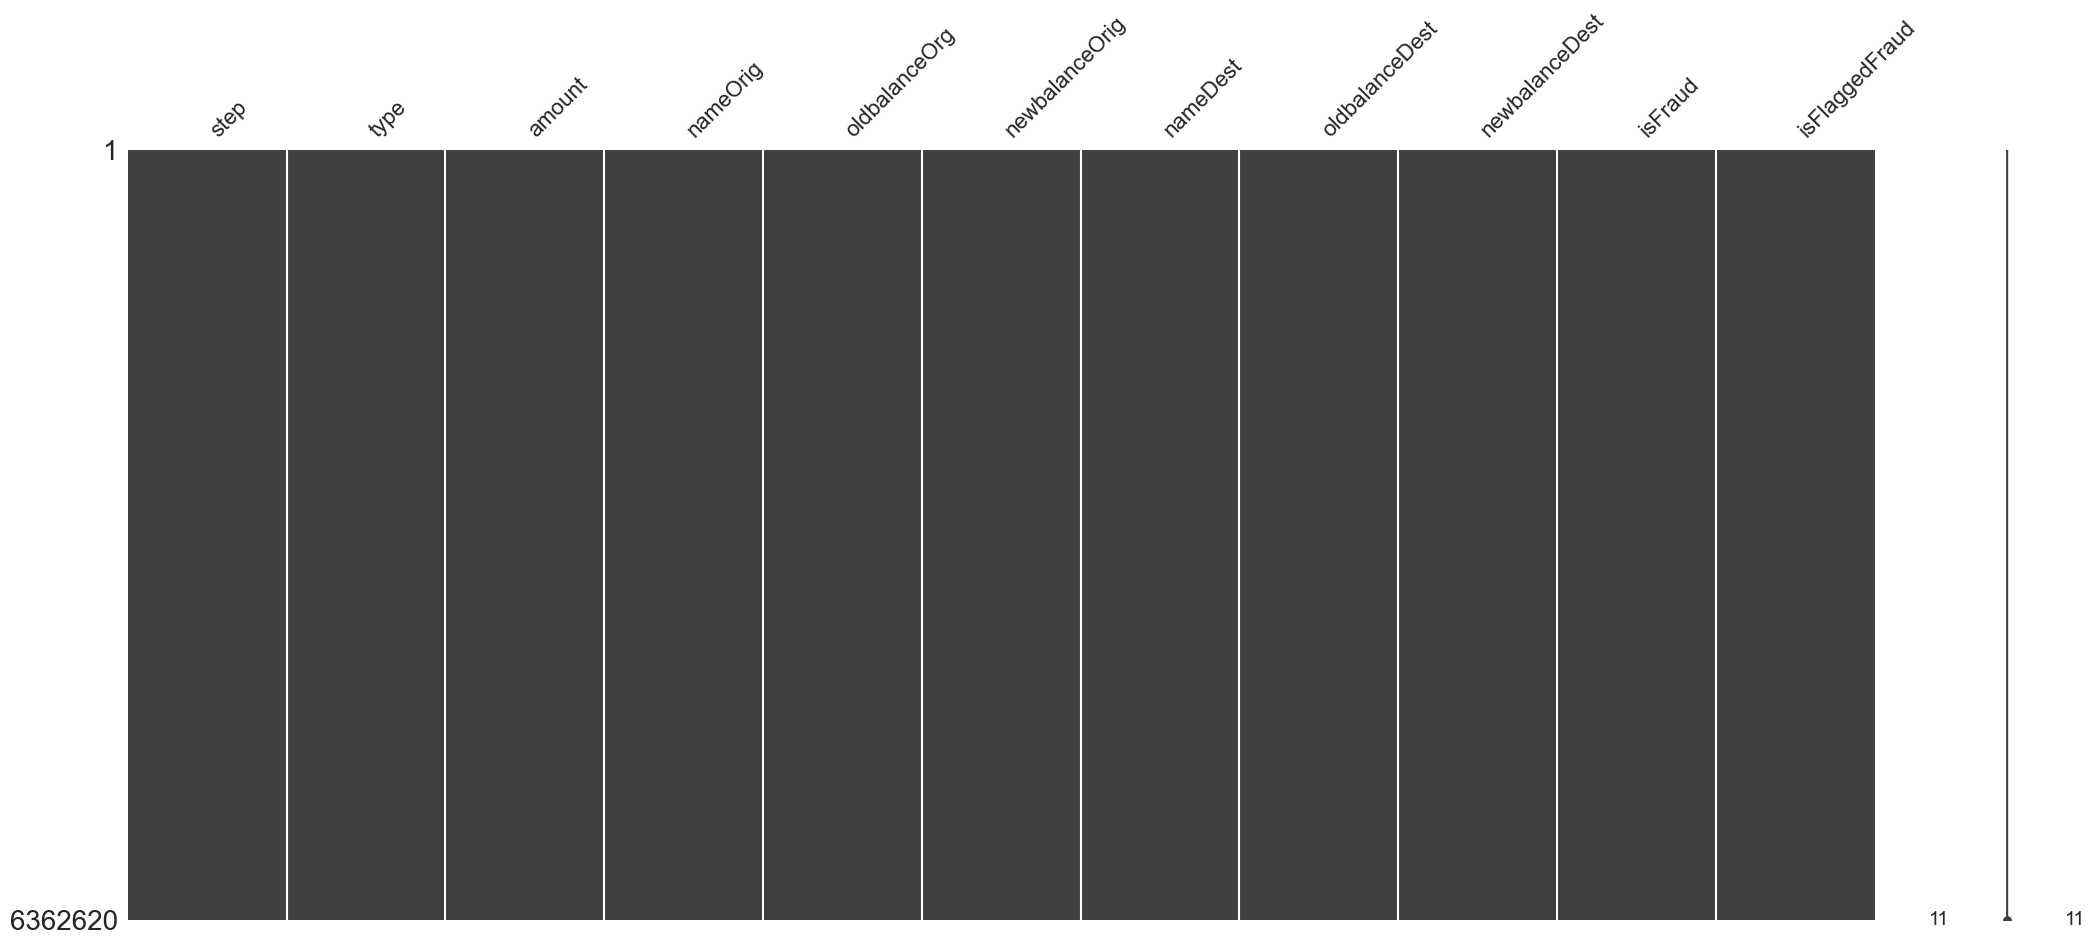

In [7]:
ms.matrix(df) # Helps to locate missing values in the columns by displaying it as graph matrix

In [8]:
fraudCount = df['isFraud'].value_counts() # Initializing a varible with the fraud count for future use

print(f"Fraud Distribution: {fraudCount}")

""" Extreme imbalance between fraud and not fraud, can't use the standard accuracy metrix
    Main focus will be Precission, Recall, F1-Score.. """

Fraud Distribution: isFraud
0    6354407
1       8213
Name: count, dtype: int64


" Extreme imbalance between fraud and not fraud, can't use the standard accuracy metrix\n    Main focus will be Precission, Recall, F1-Score.. "

In [9]:
merchant_dest_data = df[df['nameDest'].str.startswith('M')] 

"""Seperating the merchant data for analysis as it doesn't provide any info for oldbalanceDest 
and newbalanceDest (Old balance of the destination) and (New balance of the destination)
"""

"Seperating the merchant data for analysis as it doesn't provide any info for oldbalanceDest \nand newbalanceDest (Old balance of the destination) and (New balance of the destination)\n"

In [10]:
print("-------Original Dataset Shape-------n")

df.shape # Comparing the original and the merchant data sets shape

-------Original Dataset Shape-------n


(6362620, 11)

In [11]:
print("-------Merchant Data Set Shape-------")

merchant_dest_data.shape  # Comparing the original and the merchant data sets shape

-------Merchant Data Set Shape-------


(2151495, 11)

In [12]:
fraud_type = df.groupby('type').agg({  # Grouped the type of transaction that the "type" col consists of
    'isFraud': ['count','sum', 'mean'] # Calculating the count (Total Transactions) Sum (Fraud Count), Mean (Fraud Rate) 
}).round(3) # Using the Aggregate function to perform more than 1 operations of a axis 

print(fraud_type) 

          isFraud             
            count   sum   mean
type                          
CASH_IN   1399284     0  0.000
CASH_OUT  2237500  4116  0.002
DEBIT       41432     0  0.000
PAYMENT   2151495     0  0.000
TRANSFER   532909  4097  0.008


- Problem: The Cash_Out and and Tranfer shows the most/almost all of the fraud's, this can make the model to think like "If transaction is niether Cash out nor Tranfer then it's def not a fraud" 

<Axes: xlabel='type', ylabel='amount'>

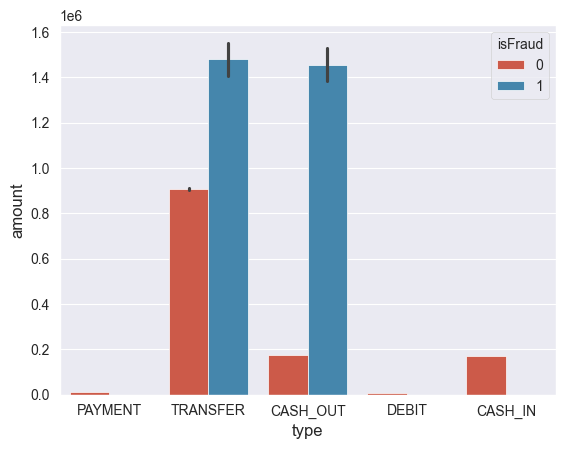

In [13]:
fraud_type_amounts = df[df['isFraud'].isin([0,1])] # Plotting the the fraud according to the type for better visualisation
sns.barplot(data=fraud_type_amounts, x='type', y='amount', hue='isFraud') 

- Downsampling non-fraud cases to the same size as fraud cases to avoid making the fraud cases to look invisible

In [14]:
fraud_df = df[df['isFraud'] == 1]
fraud_df['isFraud'].sum() # Making sure that the no of fraud and non fraud cases are equal after downsampling

np.int64(8213)

In [15]:
non_fraud_df = df[df['isFraud'] ==  0].sample(n=len(fraud_df), random_state=42)
non_fraud_df['isFraud'].value_counts() # Making sure that the no of fraud and non fraud cases are equal after downsampling

isFraud
0    8213
Name: count, dtype: int64

In [16]:
# Concatination of the fraud and non fraud data for better visualisation

balanced_fraud_df = pd.concat([non_fraud_df, fraud_df]).sample(n=len(fraud_df + non_fraud_df),random_state=42)

In [17]:
balanced_fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6055134,496,TRANSFER,766151.45,C2014325113,766151.45,0.00,C432435900,0.00,0.00,1,0
5188022,365,TRANSFER,31315.51,C1174332140,31315.51,0.00,C1252332991,0.00,0.00,1,0
4129254,302,PAYMENT,19043.02,C562601456,70067.00,51023.98,M1194092449,0.00,0.00,0,0
5555890,383,PAYMENT,11162.03,C1407068513,102921.00,91758.97,M175386067,0.00,0.00,0,0
5046728,354,CASH_OUT,268851.80,C626747845,220431.00,0.00,C833477591,1641753.59,1910605.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3611349,273,TRANSFER,159106.12,C1424958936,159106.12,0.00,C1471537489,0.00,0.00,1,0
4782248,336,TRANSFER,170038.31,C498550702,170038.31,0.00,C982724683,0.00,0.00,1,0
433961,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0,0
3215772,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0,0


In [18]:
# Making sure the isFraud count is equal

balanced_fraud_df['isFraud'].value_counts() # Data Ready For Plotting

isFraud
1    8213
0    8213
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='amount'>

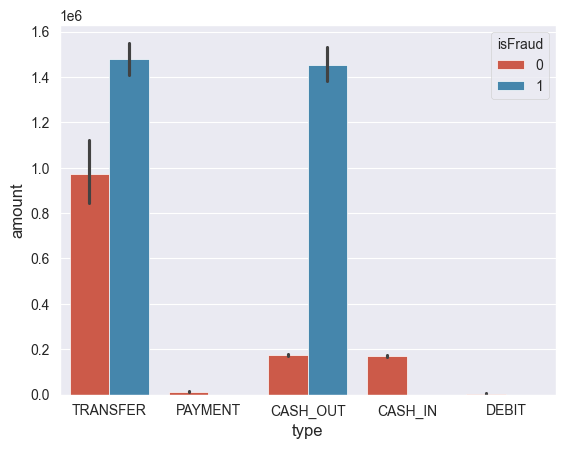

In [19]:
# Amount vs Type, we can see that the most amount has been taken out via Tranfer and Cashout as almost all frauds has happend in the following
sns.barplot(data=balanced_fraud_df, x='type', y='amount', hue='isFraud')

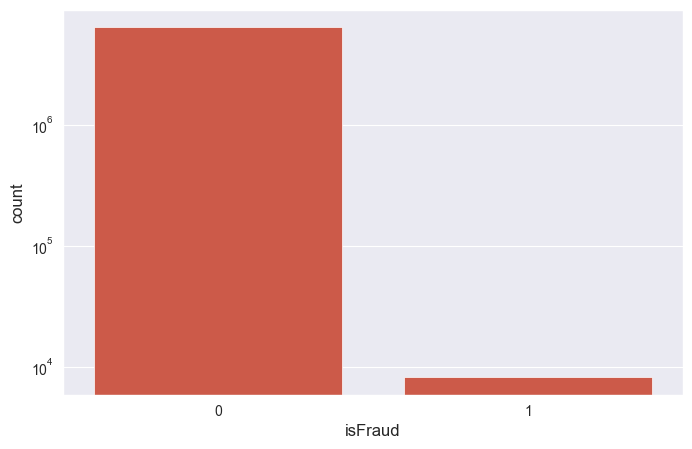

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='isFraud')
plt.yscale('log') # Converting to log scale to make sure the data fits (Else the 1 value of invisible because of majority of 0 data)
plt.show() 

- Problem 2: Majority data seems to be the not fraud data making it difficult for the model to learn weather the data is actually fraud or not.

- Solution: We can either perform downsampling or upsampling 

(Downsampling is when we reduce the samples of the majority class to match the minority class, randomly selecting a subset)

(Upsampling is when we increase the no of samples of the minority class to match the majority class, there are several methods, the one I will be using is SMOTE, SYnthetic Minority Over Sampling Technique )

Why ?

To have a diversity in the upsampled data to avoid over fitting

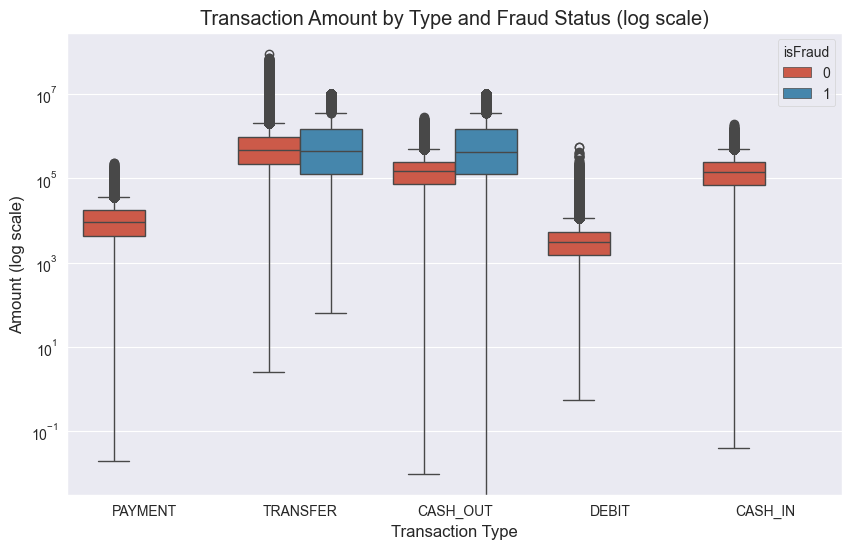

In [21]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x='type', y='amount', hue='isFraud')

plt.yscale('log') # Log scale due to wide range of amount values

plt.title('Transaction Amount by Type and Fraud Status (log scale)')

plt.xlabel('Transaction Type')

plt.ylabel('Amount (log scale)')

plt.legend(title='isFraud')

plt.show()

In [22]:
balanced_fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6055134,496,TRANSFER,766151.45,C2014325113,766151.45,0.00,C432435900,0.00,0.00,1,0
5188022,365,TRANSFER,31315.51,C1174332140,31315.51,0.00,C1252332991,0.00,0.00,1,0
4129254,302,PAYMENT,19043.02,C562601456,70067.00,51023.98,M1194092449,0.00,0.00,0,0
5555890,383,PAYMENT,11162.03,C1407068513,102921.00,91758.97,M175386067,0.00,0.00,0,0
5046728,354,CASH_OUT,268851.80,C626747845,220431.00,0.00,C833477591,1641753.59,1910605.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3611349,273,TRANSFER,159106.12,C1424958936,159106.12,0.00,C1471537489,0.00,0.00,1,0
4782248,336,TRANSFER,170038.31,C498550702,170038.31,0.00,C982724683,0.00,0.00,1,0
433961,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0,0
3215772,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0,0


In [23]:
df['step_group'] = df['step'] // 24 # Converting the steps to day for more meaningful insight

In [24]:
daily_counts = df.groupby(['step_group', 'isFraud']).size().reset_index(name='count')

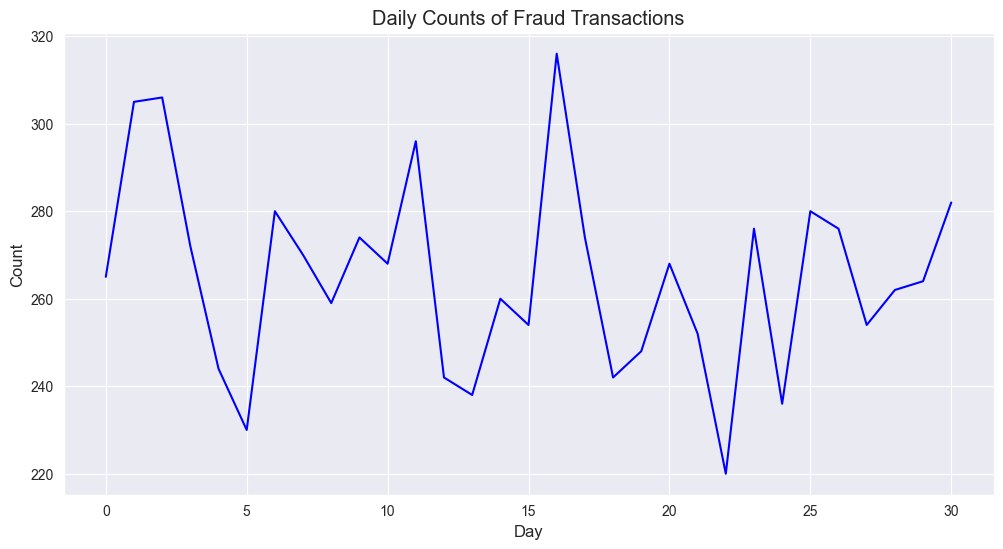

In [25]:
plt.figure(figsize=(12,6))
fraud_counts = daily_counts[daily_counts['isFraud'] == 1]
sns.lineplot(data=fraud_counts, x='step_group', y='count', color='blue')
plt.title('Daily Counts of Fraud Transactions')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

# The following graph doesn't really tell us much regarding the data or show any special signs. It's just number of frauds happening on a specific day. No urgent spikes or slowing down

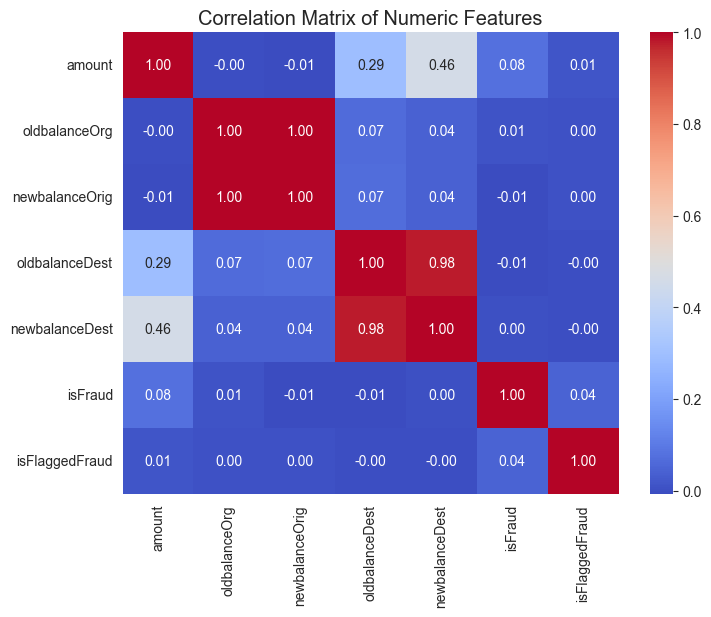

In [26]:
plt.figure(figsize=(8,6))

numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Numeric Features')

plt.show() # Correlation Matrix to look for relationship between the numeric features



# Feature Engineering

- Getting the most out of the existing features

In [27]:
from sklearn.preprocessing import LabelEncoder # To convert the numerical data to meaning ful numeric data for training of the model 

from sklearn.model_selection import train_test_split # Splitting of the data into subsets of train, test

from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier because reduced over fitting and feature importance also robustness to noise and outliers

from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix # Metric to calculate the perfomance of the model

from imblearn.over_sampling import SMOTE # For upsampling the data

In [28]:
from sklearn.preprocessing import LabelEncoder

# Merchant flags (known before transaction)
df['is_merchant_dest'] = df['nameDest'].str.startswith('M').astype(int)
df['is_merchant_orig'] = df['nameOrig'].str.startswith('M').astype(int)

# Ratios based on old balances (safe)
df['amount_to_orig_balance'] = df['amount'] / (df['oldbalanceOrg'] + 1)
df['amount_to_dest_balance'] = df['amount'] / (df['oldbalanceDest'] + 1)

# Time features (safe — derived from 'step', which is before transaction)
df['hour_of_day'] = df['step'] % 24
df['day_of_simulation'] = df['step'] // 24
df['is_night'] = ((df['hour_of_day'] >= 22) | (df['hour_of_day'] <= 5)).astype(int)
df['is_weekend'] = ((df['day_of_simulation'] % 7) >= 5).astype(int)

# Transaction type flags (safe — known before transaction)
df['is_cash_out'] = (df['type'] == 'CASH_OUT').astype(int)
df['is_transfer'] = (df['type'] == 'TRANSFER').astype(int)

# Amount-based flags (safe)
df['is_large_amount'] = (df['amount'] >= 200000).astype(int)
df['is_round_amount'] = (df['amount'] % 50000 == 0).astype(int)

# Encode transaction type (safe)
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])


In [29]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'step_group', 'is_merchant_dest', 'is_merchant_orig',
       'amount_to_orig_balance', 'amount_to_dest_balance', 'hour_of_day',
       'day_of_simulation', 'is_night', 'is_weekend', 'is_cash_out',
       'is_transfer', 'is_large_amount', 'is_round_amount', 'type_encoded'],
      dtype='object')

In [30]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define safe features — all available before the transaction, no leakage
safe_feature_cols = [
    'step',
    'amount',
    'oldbalanceOrg',
    'oldbalanceDest',
    'type_encoded',
    'is_merchant_dest',
    'is_merchant_orig',
    'amount_to_orig_balance',
    'amount_to_dest_balance',
    'hour_of_day',
    'day_of_simulation',
    'is_night',
    'is_weekend',
    'is_large_amount',
    'is_round_amount'
]

# Define leaky features — never include in training
leaky_features = [
    'newbalanceOrig',
    'newbalanceDest',
    'account_drained',
    'large_round_transfer',
    'orig_account_empty',   # removed to avoid possible leakage
    'dest_account_empty'    # removed to avoid possible leakage
]

X = df[safe_feature_cols] # Features
y = df['isFraud'] # Target


In [31]:
# Splitting the data 

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

In [32]:
smote = SMOTE(random_state=42) # Balacning the data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [33]:
# Loading the model
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

In [34]:
# Training of the model 

rf.fit(X_train_balanced, y_train_balanced)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Fraud Detectioin Evaluation")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_prob):.4f}")
print(f"AUC-PR Score:  {average_precision_score(y_test, y_prob):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Fraud Detectioin Evaluation
AUC-ROC Score: 0.9993
AUC-PR Score:  0.9978

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.99      1.00      0.99      2053

    accuracy                           1.00   1590655
   macro avg       0.99      1.00      1.00   1590655
weighted avg       1.00      1.00      1.00   1590655

